<a href="https://colab.research.google.com/github/alfianimran/Jakarta-Temp-Pred/blob/master/GlobalLandTemperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [3]:
data_new = data.loc[data['City'].isin(['Jakarta'])]
data_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
99236,1825-01-01,26.322,2.283,Jakarta,Indonesia,5.63S,106.55E
99237,1825-02-01,26.070,1.321,Jakarta,Indonesia,5.63S,106.55E
99238,1825-03-01,26.670,1.916,Jakarta,Indonesia,5.63S,106.55E
99239,1825-04-01,27.408,2.133,Jakarta,Indonesia,5.63S,106.55E
99240,1825-05-01,26.975,1.153,Jakarta,Indonesia,5.63S,106.55E


In [4]:
data_new.isnull().sum()

dt                                 0
AverageTemperature               386
AverageTemperatureUncertainty    386
City                               0
Country                            0
Latitude                           0
Longitude                          0
dtype: int64

Kemudian isi missing value yang ada dengan nilai method ffill untuk Average dan mean untuk kolom 'AverageTemperatureUncertainty'

In [5]:
data_new['AverageTemperature'].fillna(method='bfill', inplace=True)
data_new['AverageTemperatureUncertainty'].fillna(int(data['AverageTemperatureUncertainty'].mean()), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
data_new.isnull().sum()

dt                               0
AverageTemperature               1
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 99236 to 101500
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2265 non-null   object 
 1   AverageTemperature             2264 non-null   float64
 2   AverageTemperatureUncertainty  2265 non-null   float64
 3   City                           2265 non-null   object 
 4   Country                        2265 non-null   object 
 5   Latitude                       2265 non-null   object 
 6   Longitude                      2265 non-null   object 
dtypes: float64(2), object(5)
memory usage: 141.6+ KB


In [8]:
data_new['dt'] = pd.to_datetime(data['dt'], format='%Y-%m-%d')
data.head()

<ipython-input-8-f23cff0950bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['dt'] = pd.to_datetime(data['dt'], format='%Y-%m-%d')


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [9]:
data_new = data_new.sort_values(by = 'dt')
data_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
99236,1825-01-01,26.322,2.283,Jakarta,Indonesia,5.63S,106.55E
99237,1825-02-01,26.070,1.321,Jakarta,Indonesia,5.63S,106.55E
99238,1825-03-01,26.670,1.916,Jakarta,Indonesia,5.63S,106.55E
99239,1825-04-01,27.408,2.133,Jakarta,Indonesia,5.63S,106.55E
99240,1825-05-01,26.975,1.153,Jakarta,Indonesia,5.63S,106.55E


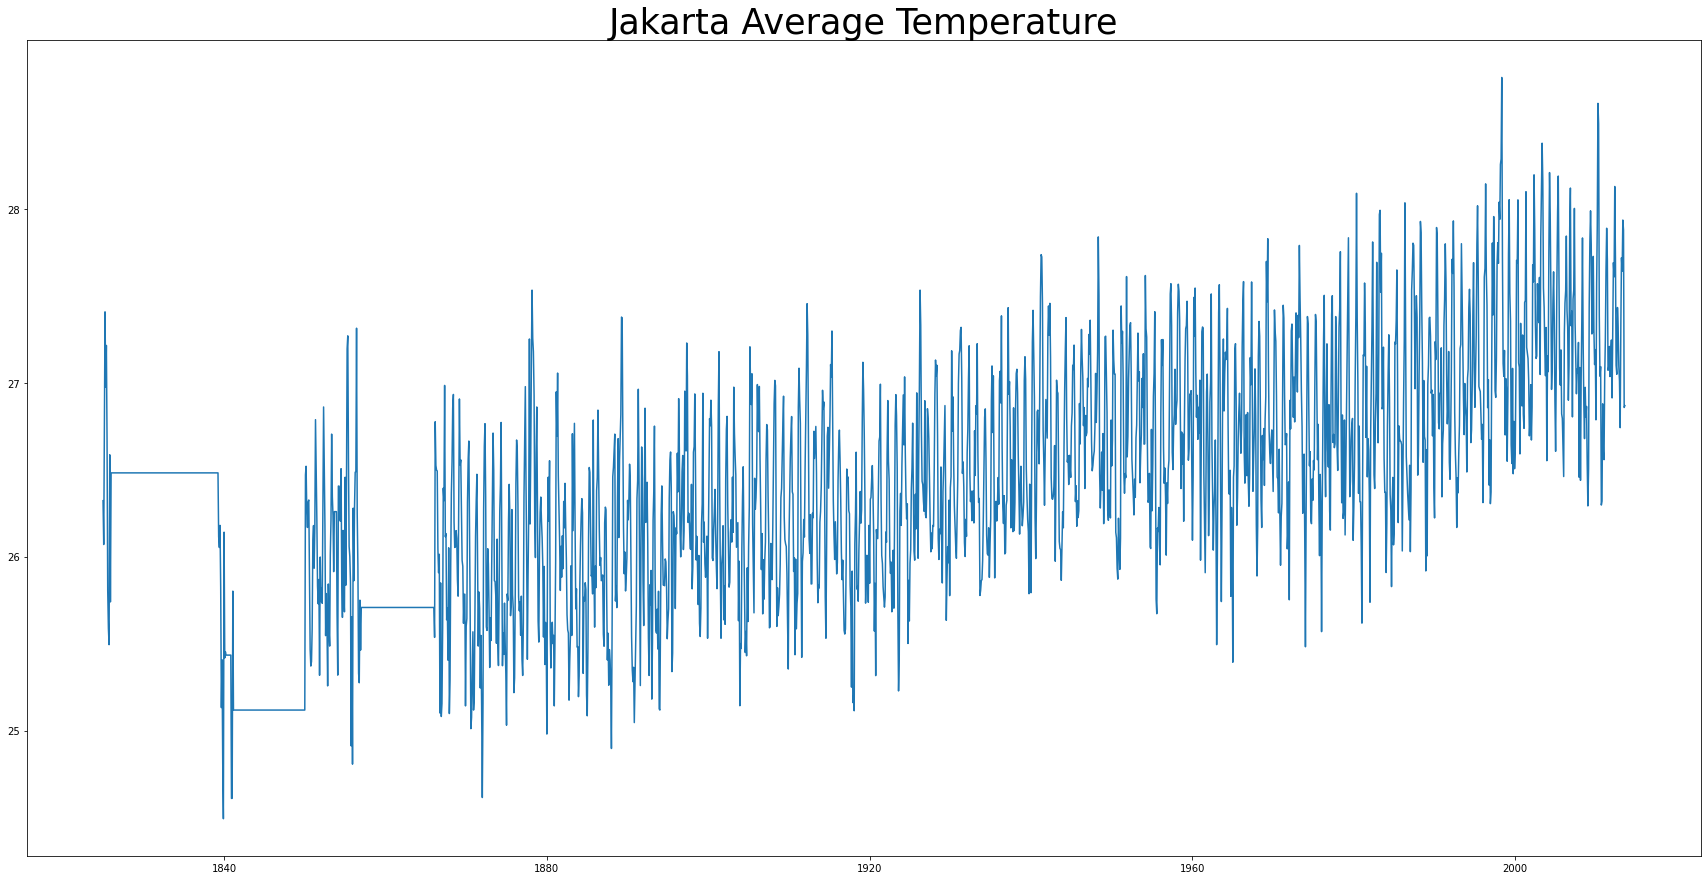

In [10]:
date = data_new['dt'].values
temp = data_new['AverageTemperature'].values

np.array(date)
np.array(temp)

plt.figure(figsize=(30,15))
plt.plot(date, temp)
plt.title('Jakarta Average Temperature', fontsize=35)
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size=0.2, shuffle=False)

In [12]:
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(x_train.reshape(-1, 1))
val_scale = scaler.fit_transform(x_test.reshape(-1, 1))

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [14]:
train_set = windowed_dataset(x_train, window_size=32, batch_size=150, shuffle_buffer=1500)
val_set = windowed_dataset(x_test, window_size=32, batch_size=150, shuffle_buffer=1500)

model = tf.keras.models.Sequential([
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [15]:
Mae = (data_new['AverageTemperature'].max() - data_new['AverageTemperature'].min()) * 10/100
print(Mae)

0.4263000000000002


In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.37480000000000013 and logs.get('val_mae')<0.37480000000000013):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [17]:
from tensorflow.keras.optimizers import Adagrad, Adadelta, RMSprop, Adam

opt = Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0)

opt = Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08, decay=0.0)

opt = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=opt,
              metrics=["mae"])

history = model.fit(train_set, epochs=200, validation_data = val_set, callbacks=[callbacks])

Epoch 1/200
12/12 [==============================] - 26s 793ms/step - loss: 25.0192 - mae: 25.5192 - val_loss: nan - val_mae: nan
Epoch 2/200
12/12 [==============================] - 2s 156ms/step - loss: 22.5041 - mae: 23.0041 - val_loss: nan - val_mae: nan
Epoch 3/200
12/12 [==============================] - 2s 158ms/step - loss: 18.0760 - mae: 18.5760 - val_loss: nan - val_mae: nan
Epoch 4/200
12/12 [==============================] - 2s 158ms/step - loss: 11.9637 - mae: 12.4637 - val_loss: nan - val_mae: nan
Epoch 5/200
12/12 [==============================] - 2s 161ms/step - loss: 4.5861 - mae: 5.0834 - val_loss: nan - val_mae: nan
Epoch 6/200
12/12 [==============================] - 2s 159ms/step - loss: 0.9586 - mae: 1.4121 - val_loss: nan - val_mae: nan
Epoch 7/200
12/12 [==============================] - 2s 158ms/step - loss: 0.4147 - mae: 0.8036 - val_loss: nan - val_mae: nan
Epoch 8/200
12/12 [==============================] - 2s 160ms/step - loss: 0.2368 - mae: 0.5667 - val_

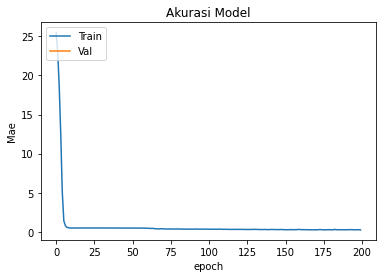

In [18]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Akurasi Model')
plt.ylabel('Mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

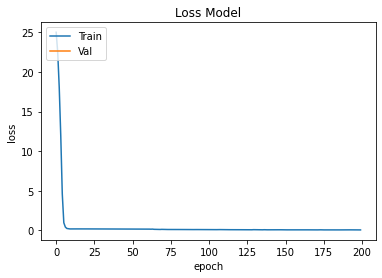

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()